<a href="https://colab.research.google.com/github/usmanweb/SupportFiles/blob/master/IEEE_Hands_On_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Setting up the environment with everything we need


---

First things first, lets get us a screen!


In [1]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
display.start()



---


# Importing Libraries


---
The most important library we need is *gym*. **gym** provides us **environments**.







## Computing Libraries



Its really up to you whatever library you are comfortable with. **gym** uses NumPy base so you should be able to use it with any library of your choice. I'll use just NumPy. Tensorflow and PyTorch might be your cup of tea so go ahead use them.

## Ploting libraries

Totally your choice. I like matplotlib so let's use that for today!


---




In [2]:
import gym
from gym import spaces

import numpy as np
import random #You could just use np.random as well, totally fine
from random import randint

import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

---
# Functions of ENVIRONMENT and AGENT
---
A picture is worth a thousand words!

*   What is an **environment** in RL? And What is an **agent**?
*   What is *state*?
[State can be the time in Environment or mood of the Mom.]
*   What is an *action*?
*   What is *reward*?

---

![picture](https://drive.google.com/uc?export=view&id=1SlGkwm96UQxLjFiEP9xe3bbnr_VPAa_4)


https://drive.google.com/file/d/13oYKs5qWbpPekxMQN5ExG2kLo4ih4pKS/view?usp=sharing


---
# ***THE DRILL***
---


In the *beginning* there was nothing. then came "initial state"

1. REST() env and get state
  2.   Give this state to *agent*, wait for him to *act* --> ACT()
  3.   Give his *action* to env and get *reward* --> STEP()
  4.   Pass this reward to *agent* for his behavior, make him learn --> UPDATE(). Plot something if you need to.
  5.   Go to step 2

---





---


# Importing you first **gym** environment



---

*   What is this **gym** anyway? [Collection of Enviroment methods]
*   Why should I use gym? My work has nothing to do with *games*.
*   Where do I find documentation and help for gym?
*   What exactly are *spaces* in gym? [Action Space: Collection of Actions which agents are allowed to take. Similarly for Environment Space...]

# Complete gym codes
Go check it out on github: https://github.com/openai/gym/tree/master/gym 

# More gym environments for you to try
More OpenAI gym environments can be found on OpenAI gym website. 
https://gym.openai.com/envs/#classic_control 

---
# How do I install gym on my local machine, I'm using Visual Studio Code and Anaconda
*    Create  new environment e.g. NumPygymEnv
*    Activate the newly created environment
*    pip install gym

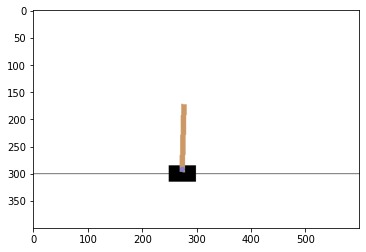

In [5]:
env_name = "CartPole-v1"
# env_name = "MountainCar-v0"
# env_name = "Pendulum-v0"


env = gym.make(env_name)

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action = env.action_space.sample()
  #action = 1
  print("The selected action is: ",action)
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

In [ ]:
# display.stop()

---
# But how do I know what are the inputs and outputs of these functions??
---

1.   help()
2.   dir()
3.   Go to the source code -> https://github.com/openai/gym/tree/master/gym 
4.   If you still need help, google it






In [ ]:
help(env.step)

Help on method step in module gym.wrappers.time_limit:

step(action) method of gym.wrappers.time_limit.TimeLimit instance
    Run one timestep of the environment's dynamics. When end of
    episode is reached, you are responsible for calling `reset()`
    to reset this environment's state.
    
    Accepts an action and returns a tuple (observation, reward, done, info).
    
    Args:
        action (object): an action provided by the agent
    
    Returns:
        observation (object): agent's observation of the current environment
        reward (float) : amount of reward returned after previous action
        done (bool): whether the episode has ended, in which case further step() calls will return undefined results
        info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning)



In [ ]:
?env.observation_space

In [ ]:
dir(env)

---
## What if I need to do environment specific tasks in my code?
---
 Can I get an environment name or id from the created env?

 
Yes you can. Lets google it. Head over to google search and type "gym get env name". Go thought first 2,3 links. Let me know what you found?

In [ ]:
print("Environment name: ",env.unwrapped.spec.id)

Environment name:  CartPole-v1


In [ ]:
if "CartPole" in env.unwrapped.spec.id:
  print("Env is CartPole Env")

Env is CartPole Env


---
# Let's write our **AGENT** now!!
---
What does an agent do?

What functions did we say an agent will have?


---

---
# Q-table update
---

From Sutton and Barto Book:

$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha\left[R_{t+1} + \gamma \max_a {Q(S_{t+1},a)}-Q(S_t,A_t)\right]$

$Q(o,a) \leftarrow Q(o,a) + \alpha\left[R_{t+1} + \gamma \max_a {Q(o_{prime},a)}-Q(o,a)\right]$


---

In [6]:
class Agent:
  def __init__(
    self, lr: float, gamma: float, act_space: spaces.Discrete,
    obs_space: spaces.Discrete, num_episodes: int, obs_space_len , action_space_len
  ):

    self.lr = lr  # learning rate
    self.gamma = gamma  # gamma parameter
    self.act_space = act_space
    self.obs_space = obs_space
    self.obs_space_len = obs_space_len
    self.action_space_len = action_space_len
    self.num_episodes = num_episodes  # episodes
    self.eps: Array = np.exp(-5*np.linspace(0,1,num_episodes))   # epsilon value
    self.qtable = np.random.uniform(low=-2, high=0, size=(self.obs_space_len+[self.action_space_len])) # Q-table
    

  def act(self, o: int, episode_i: int) -> int:  # function to choose action

    if random.uniform(1.0, 0.0) < self.eps[episode_i]:  # epsilon-greedy condition for exploration
      return self.action_space.sample()# a uniformly sampled random action from action_space


    return np.argmax(self.qtable[o])#the action that has the highest Q-value in state/observation o


  def update(self, o: int, a: int, r: float, o_prime: int) -> float:  # agent update function (e.g. Q-learning update)

    old_o_a_value = self.qtable[o][a]   #store the Q-value for observation o and action a 
    q_prime  = np.max(self.qtable[o_prime]) # estimate of optiomal future value (maximum Q-value in observation o_prime)

    # Update Q-table based on the equation above
    td_target = r + self.gamma * q_prime

    self.qtable[o][a] += self.lr *(td_target - old_o_a_value) 

    

    return  self.qtable[o][a]-old_o_a_value# return delta update to training loop



---
For some environments we make small adjustments, like discretizing the states.

---

In [8]:
  def get_discrete_state(state,obs_space_len,bins):
    stateIndex = []
    for i in range(obs_space_len):
      stateIndex.append(np.digitize(state[i], bins[i]) - 1) # -1 will turn bin into index
    return tuple(stateIndex) 

---
Let's see if our newly created agent is behaving the way it is supposed to.

---

In [ ]:
agent = Agent(lr=0.1, gamma=0.95, act_space=env.action_space, 
              obs_space=env.observation_space, num_episodes=10000, 
              obs_space_len=[20], action_space_len=2)
print(agent.qtable.shape)


---
# The main loop for training the agent
---

Here is where all the action happens!

In [ ]:
import pdb
random.seed(1234)  # python random number generator seed
DISPLAY_EVERY = 100
if "CartPole" in env_name:
  # print("Env is CartPole Env")
  
  num_bins = 20
  bins = [
          np.linspace(-4.8, 4.8, num_bins),
          np.linspace(-4, 4, num_bins),
          np.linspace(-.418, .418, num_bins),
          np.linspace(-4, 4, num_bins)
        ]

lr = 0.1  # learning rate
gamma = 0.95  # gamma parameter
num_episodes = 10000  # number of steps (episodes) in epsilon log-space
# initialize our Rx agent with learning parameters and gym parameters
if "CartPole" in env_name:
  obs_space_len = [num_bins+1] *len(env.observation_space.high)
  action_space_len = env.action_space.n
  agent = Agent(
      lr=lr,gamma=gamma,act_space=env.action_space,obs_space=env.observation_space,
      num_episodes=num_episodes,obs_space_len=obs_space_len, action_space_len=action_space_len
      )
  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
else:
  obs_space_len = [env.horizon+1]
  action_space_len = 2
  agent = Agent(
      lr=lr,gamma=gamma,act_space=env.action_space,obs_space=env.observation_space,
      num_episodes=num_episodes,obs_space_len=obs_space_len, action_space_len=action_space_len
      )  
# show_verbose = True  # print information for debugging
show_verbose = False
render_gym = False  # render gym
# render_gym = True
running_len = 5  # length of our running training data
running_delta = []  # running delta (e.g. the last running_len delta update)
running_acc = []  # running accuracy (e.g. the last running_len accuracy)


for episode_i in range(num_episodes): # episode loop
  step_counter = 1
  done = False
  if show_verbose:
    print('starting episode {episode_i}...'.format(episode_i=episode_i))
  delta_update = []  # delta update of our Q-table
  n_successes: int = 0  # number of optimal actions (actions with maximum reward)
  cumul_r: float = 0.0  # cumulative reward
  ############### Reset the environment and get initial o ##########################




  if "CartPole" in env_name:
    o = get_discrete_state(o,obs_space_len=len(env.observation_space.high),bins=bins)
  while not done:
    ################ Call the act function from agent and get the action for current o and episode_i ####################




    ################ Pass this action to what function now? ############### What to get from that function? #############





    if "CartPole" in env_name:
      o_prime = get_discrete_state(o_prime,len(env.observation_space.high),bins=bins)

    delta_update.append(agent.update(o=o,a=a,r=r,o_prime=o_prime))  # update agent with transition, get delta update

    ######################## Update the state ##################################





    cumul_r += r  # add reward to cumulative reward
    n_successes += int(r > 0.0)  # success if optimal action-reward of 1.0
    step_counter += 1
    if episode_i % DISPLAY_EVERY == 0:
      if render_gym:
        if "CartPole" in env_name:
          screen = env.render(mode='rgb_array')
          plt.imshow(screen)
          ipythondisplay.clear_output(wait=True)
          ipythondisplay.display(plt.gcf())
      if show_verbose:   # show transition of our model (e.i. <o, a, r, o'>)
        print(
          'transition=<{o}, {a}, {r}, {o_prime}>,'
          ' delta_update={delta}'.format(
            o=o, a=a, r=r, o_prime=o_prime, delta=delta_update[-1]
          )
        )    

  running_acc.append(n_successes / step_counter)  # add latest accuracy to running data
  running_delta.append(sum(delta_update).item())  # add latest update delta to running data
  # print(running_delta)
  print(
    'episode {episode_i}: cumul_reward={cumul_r}, accuracy:{acc:0.1}, '
    'cumul_delta={cumul_delta:0.1}, eps={eps:0.1}'.format(
      episode_i=episode_i, cumul_r=cumul_r, acc=running_acc[-1],
      cumul_delta=running_delta[episode_i], eps=agent.eps[episode_i]
    )
  )

  # training stop conditions
  if (
    all([acc == 1.0 for acc in running_acc])  # all running accuracy are maximized
    and all([delta < 0.0001 for delta in running_delta])  # all running delta update a lower than 0.0001
    and episode_i >= running_len  # running data have reached running length
  ) or episode_i >= num_episodes + running_len:  # epsilon was 0 for all running data (nothing will change)
    break  # exit training loop

ipythondisplay.clear_output(wait=True)
env.close()  # close gym environment

In [ ]:
display.stop()

In [ ]:
stepsize= round(num_episodes/20)
stdfigsize=(3.51*1.5,3*1.5)
x = np.arange(1,num_episodes,stepsize)
mkrs = ["C2-s","C0-o","C1-^","C4-*","C3-d","C4-x","C5-.","C6-d","C7-v","C8-,","C9-<","C20","C11-","C12-"]
fig = plt.figure(figsize=stdfigsize)

plt.plot(x, running_acc[1:-1:stepsize],mkrs[0],label='Accuracy')
plt.xlabel('Episode Number', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right',shadow=True,fontsize='large')
plt.grid(True)


In [ ]:
stepsize= round(num_episodes/20)
stdfigsize=(3.51*1.5,3*1.5)
x = np.arange(1,num_episodes,stepsize)
mkrs = ["C2-s","C0-o","C1-^","C4-*","C3-d","C4-x","C5-.","C6-d","C7-v","C8-,","C9-<","C20","C11-","C12-"]
fig = plt.figure(figsize=stdfigsize)
plt.plot(x, running_delta[1:-1:stepsize],mkrs[4],label='Delta')
plt.xlabel('Episode Number', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='upper right',shadow=True,fontsize='large')
plt.grid(True)

# Great Stuff but I'm not here to play GAMES!!


---


What if I want to use RL for **REAL** research?


*   Wireless communications
*   Control systems
*   Biomedical engineering
*   Informatics


---


### How do I make RL useful for my **WORK**
Good News, you CAN!

Here's how:
Remember the **DRILL**??


1.   Write your own *Environment*
2.   Modify the *Agent* if your need to
3.   Run the training loop (do I need to store any additional permonace metric??)
4.   Plot your results





In [ ]:
class WireLessEnv(gym.Env):
  def __init__(self, n_PU =1 , horizon =20):
    super(WireLessEnv, self).__init__()  # initialize gym.Env base class
    self.action_space: spaces.MultiBinary = spaces.Box(low=0,high=1,shape=(n_PU,),dtype=np.int32)
    self.observation_space: spaces.Discrete = spaces.Discrete(horizon + 1)  # observation space {0, 1, ..., horizon}
    self.horizon = horizon  # gym horizon to know when we are DONE
    self.n_PU = n_PU #Number of PUs
    self.TxPattern = np.random.randint(2, size=(horizon,n_PU))
    self.t = 0  # initial time-step / observation 
    
  

  def reset(self): # Returns initial state of environment
    self.t = 0
    ############### Return initial state of the environment #########################################





    return 



  def step(self, action): #action is a binary  0 or 1

    if self.t < self.horizon:  # non-terminal observation, horizon not reached
      ### Calculate Reward
      r = np.sum((action == self.TxPattern[self.t,:]).astype(int)) 

    else:  # gym horizon reached
      r = 0.0

    self.t += 1  # increment our time-step / observation
    o = self.t  # observation that will return
    done = (self.t == self.horizon)  # is terminal gym state reached

    return o, r, done, {}  # gyms always returns <obs, reward, terminal obs reached, debug/info dictionary>

  def render(self,mode='human'):
    print('Lets see TxPattern \n')
    print(self.TxPattern)





---
# Let's get our env
---

In [ ]:
env_name = "WirelessEnv"
env = WireLessEnv()

In [ ]:
dir(env.action_space)

In [ ]:
stepsize= round(num_episodes/20)
stdfigsize=(3.51*1.5,3*1.5)
x = np.arange(1,num_episodes,stepsize)
mkrs = ["C2-s","C0-o","C1-^","C4-*","C3-d","C4-x","C5-.","C6-d","C7-v","C8-,","C9-<","C20","C11-","C12-"]
fig = plt.figure(figsize=stdfigsize)
plt.plot(x, running_acc[1:-1:stepsize],mkrs[0],label='Accuracy')
plt.xlabel('Episode Number', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='lower right',shadow=True,fontsize='large')
plt.grid(True)


In [ ]:
stepsize= round(num_episodes/20)
stdfigsize=(3.51*1.5,3*1.5)
x = np.arange(1,num_episodes,stepsize)
mkrs = ["C2-s","C0-o","C1-^","C4-*","C3-d","C4-x","C5-.","C6-d","C7-v","C8-,","C9-<","C20","C11-","C12-"]
fig = plt.figure(figsize=stdfigsize)
plt.plot(x, running_delta[1:-1:stepsize],mkrs[4],label='Delta')
plt.xlabel('Episode Number', fontsize='large')
plt.ylabel('Accuracy', fontsize='large')
plt.legend(loc='upper right',shadow=True,fontsize='large')
plt.grid(True)

---
# What was Epsilon?
---
There is something called exploration vs. expoloitation in RL.


> *Should the agent try a new action, or the action that gave the best reward previously?*

A dog may have gotten a reward for spinning around but should it try fetching the ball in hopes of getting better reward?

*   Try the best action so far (greedy action) with probability $1-\epsilon$
*  Try a random action from action-space with probability $\epsilon$
*   Should this probability $\epsilon$ be constant thoughout the training?

There are other ways to balance explorartion vs. exploitation e.g. Upper Confidence Bounds (UCB)


---



In [ ]:

stepsize= round(num_episodes/20)
stdfigsize=(3.51*1.5,3*1.5)
x = np.arange(1,num_episodes,stepsize)
mkrs = ["C2-s","C0-o","C1-^","C4-*","C3-d","C4-x","C5-.","C6-d","C7-v","C8-,","C9-<","C20","C11-","C12-"]
fig = plt.figure(figsize=stdfigsize)
plt.plot(x, agent.eps[1:-1:stepsize],mkrs[2],label='$\epsilon$')
plt.xlabel('Episode Number', fontsize='large')
plt.ylabel('$\epsilon$', fontsize='large')
plt.legend(loc='upper right',shadow=True,fontsize='large')
plt.grid(True)